In [1]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [31]:
PATH = "../data.csv"
dataset = pd.read_csv(PATH)
dataset.fillna(0, inplace=True)
dataset = dataset[(dataset["Year of Release"] >= 1960) & (dataset["Year of Release"] <= 2017)]
dataset = dataset.drop(['Description','Movie Name', 'Stars', 'Unnamed: 0' ], axis=1)





In [32]:
for column in dataset:
 if type(dataset[column][0]) is str:
     dataset[column] = pd.factorize(dataset[column])[0]

<Axes: >

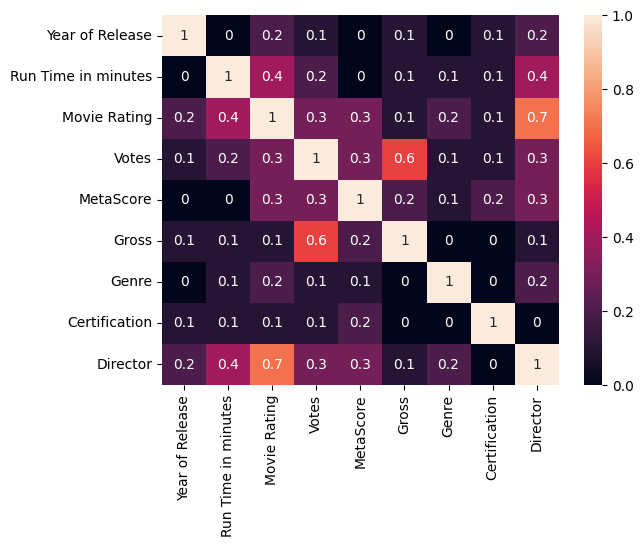

In [33]:
sns.heatmap(
 round(
 abs(dataset.corr()),
 1,
 ),
 annot=True,
)

In [34]:
dataset['Movie Rating'] = dataset['Movie Rating'].apply(lambda x: round(x))

train_input, test_input, train_output, test_output = train_test_split(
 dataset.drop('Movie Rating', axis=1),
 dataset["Movie Rating"],
 test_size=0.2
)
dataset

,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director
0,1994,142,9,2804443,82.0,28340000.0,0,0,0
1,1972,175,9,1954174,100.0,134970000.0,1,0,1
2,1993,135,9,12995,0.0,0.0,2,1,2
3,1975,87,9,42231,0.0,0.0,3,2,3
4,2008,152,9,2786129,84.0,534860000.0,4,3,4
...,...,...,...,...,...,...,...,...,...
9991,2013,85,5,15805,29.0,0.0,13,0,3317
9992,2007,96,5,16888,50.0,770000.0,46,0,1796
9994,2010,87,5,10751,0.0,0.0,110,0,3256
9995,2017,140,5,10183,0.0,1010000.0,157,5,989


In [35]:
model = GaussianNB()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)
print(f"Точность модели на тестовом участке = {accuracy}")

Точность модели на тестовом участке = 0.40554156171284633
